In [5]:
# Importamos librerias

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime

In [6]:
# Importamos el archivo csv

Nasa = pd.read_csv('mission_launches.csv', encoding = 'latin-1')

In [7]:
# Vemos las primeras 5 filas

Nasa.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
# Vemos las ultimas 5 filas

Nasa.tail()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


In [9]:
# Vemos el total de filas y columnas

Nasa.shape

(4324, 9)

In [10]:
# Vemos el tipo de dato que contiene mi dataset

Nasa.dtypes

Unnamed: 0.1       int64
Unnamed: 0         int64
Organisation      object
Location          object
Date              object
Detail            object
Rocket_Status     object
Price             object
Mission_Status    object
dtype: object

In [11]:
# Cantidad de valores nulos

Nasa.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [12]:
porcentaje_nulos_columnas = (Nasa.isnull().sum() / len(Nasa)) * 100

print(porcentaje_nulos_columnas)

Unnamed: 0.1       0.000000
Unnamed: 0         0.000000
Organisation       0.000000
Location           0.000000
Date               0.000000
Detail             0.000000
Rocket_Status      0.000000
Price             77.705828
Mission_Status     0.000000
dtype: float64


In [13]:
# Se elimina la columna de precios, la cantidad de valores nulos es alta

Nasa = pd.read_csv('mission_launches.csv')


Nasa.drop(Nasa.columns[7], axis=1, inplace=True)

In [14]:
Nasa.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,Success


In [15]:
# Se cambia el nombre de la columna

Nasa = Nasa.rename(columns={'Organisation': 'Organization'})

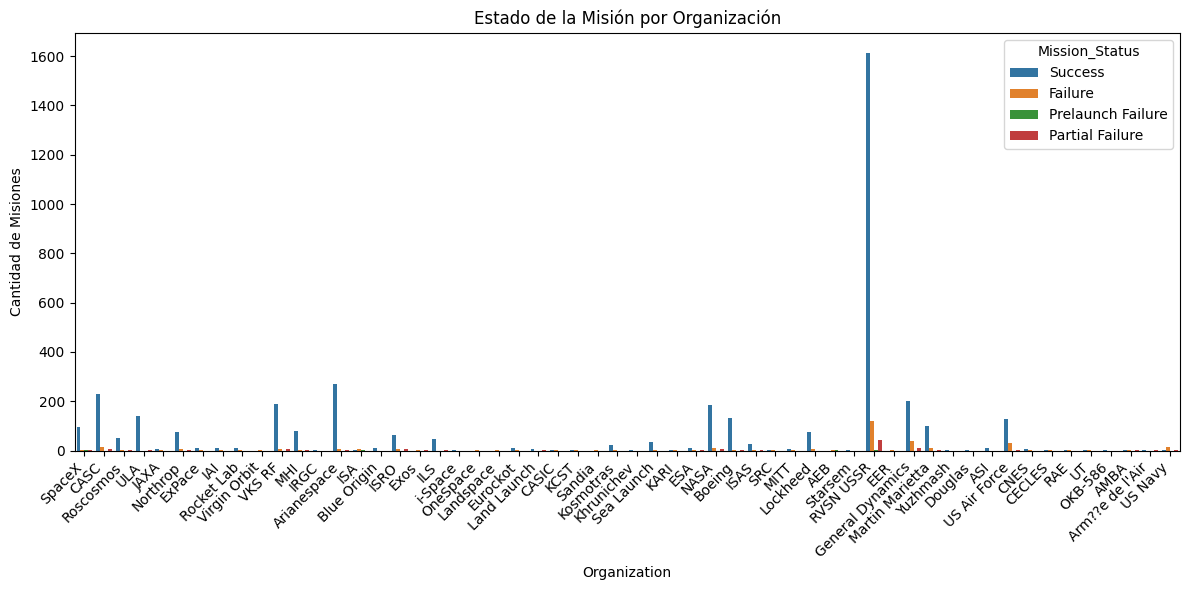

In [16]:
# Histograma

plt.figure(figsize=(12, 6))
sns.countplot(data=Nasa, x='Organization', hue='Mission_Status')
plt.xticks(rotation=45, ha='right')
plt.title('Estado de la Misión por Organización')
plt.xlabel('Organization')
plt.ylabel('Cantidad de Misiones')
plt.tight_layout()
plt.show()

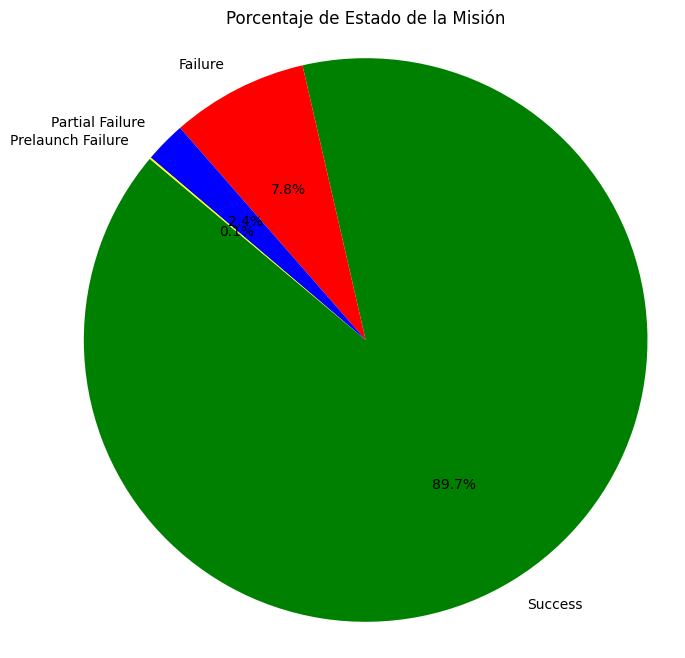

In [17]:
 # Grafico de torta

status_counts = Nasa['Mission_Status'].value_counts()

colors = ['green', 'red', 'blue', 'yellow']


plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)


plt.title('Porcentaje de Estado de la Misión')


plt.axis('equal')
plt.show()

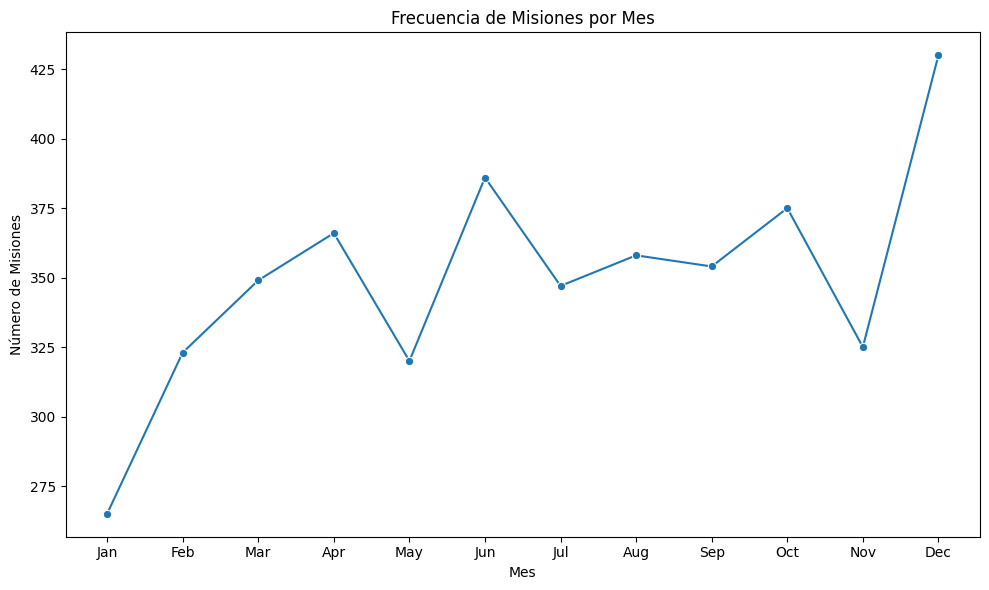

In [20]:
#Vemos el mes en que sehacen mas misiones

Nasa['Date'] = pd.to_datetime(Nasa['Date'], errors='coerce')

Nasa['Month'] = Nasa['Date'].dt.strftime('%b')

month_counts = Nasa['Month'].value_counts().sort_index()

month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_counts = month_counts.reindex(month_order)

# Crear el gráfico de líneas

plt.figure(figsize=(10, 6))
sns.lineplot(x=month_counts.index, y=month_counts.values, marker='o')

# Añadir etiquetas y título
plt.title('Frecuencia de Misiones por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Misiones')

# Mostrar el gráfico
plt.tight_layout()
plt.show()